## ML A-3 Q1 | 2019040

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [176]:
population = pd.read_csv("population.csv")
more_than_50k = pd.read_csv("more_than_50k.csv")

In [177]:
## 1. preprocessing

## 1.1
population.replace(" ?",float("nan"),inplace=True)

## 1.2

remove_cols = []
total = len(population)
for col in population.columns:
    
    nan_num = population[col].isna().sum()
    
    if nan_num != 0:
        print(col, "- NaN count:", nan_num,"| NaN ratio:",nan_num/total)
    
    if nan_num/total >= 0.40:
        remove_cols.append(col)
    
## remove cols
population.drop(remove_cols,axis=1,inplace=True)

GRINST - NaN count: 708 | NaN ratio: 0.003548463084456429
MIGMTR1 - NaN count: 99696 | NaN ratio: 0.4996717170451527
MIGMTR3 - NaN count: 99696 | NaN ratio: 0.4996717170451527
MIGMTR4 - NaN count: 99696 | NaN ratio: 0.4996717170451527
MIGSUN - NaN count: 99696 | NaN ratio: 0.4996717170451527
PEFNTVTY - NaN count: 6713 | NaN ratio: 0.03364524390671752
PEMNTVTY - NaN count: 6119 | NaN ratio: 0.030668143522300687
PENATVTY - NaN count: 3393 | NaN ratio: 0.017005558256441615


In [178]:
## 3.1 replace missing values with the mode
modes = population.mode().iloc[0]

for col in population.columns:
    population[col].fillna(population[col].mode()[0],inplace=True)

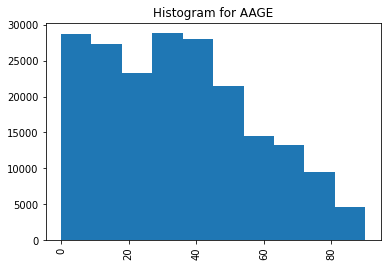

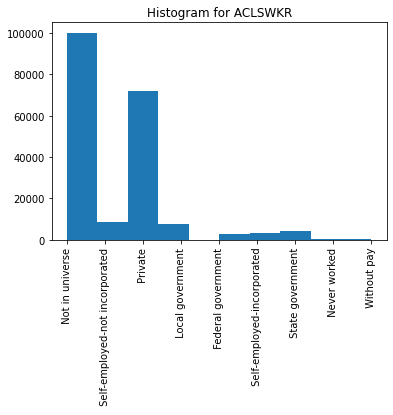

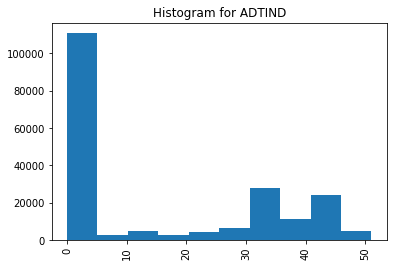

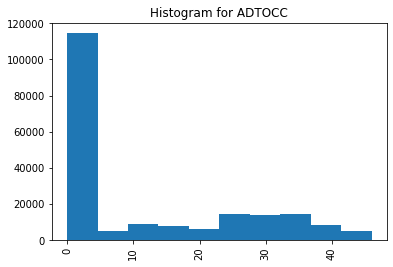

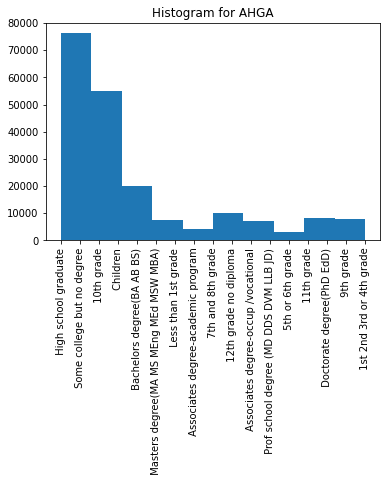

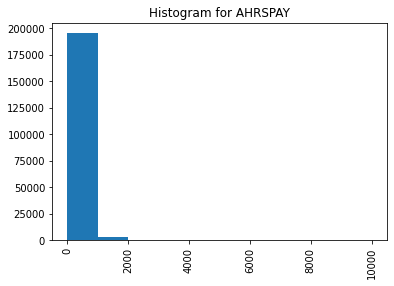

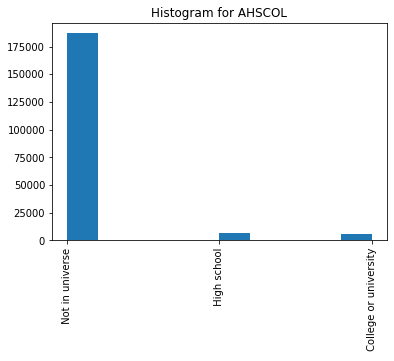

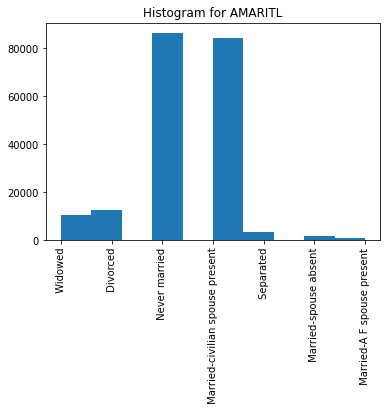

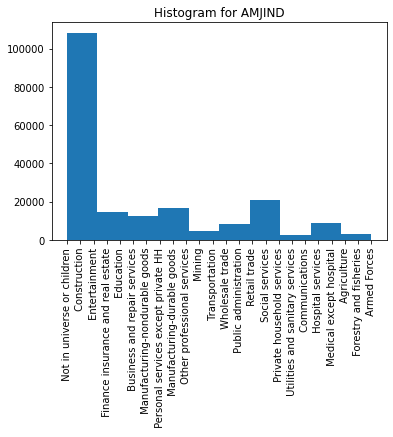

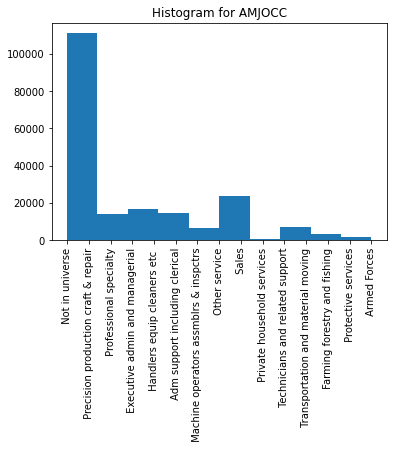

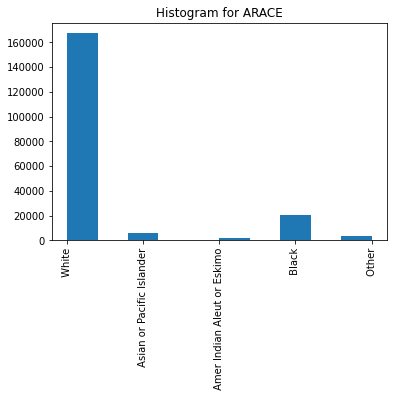

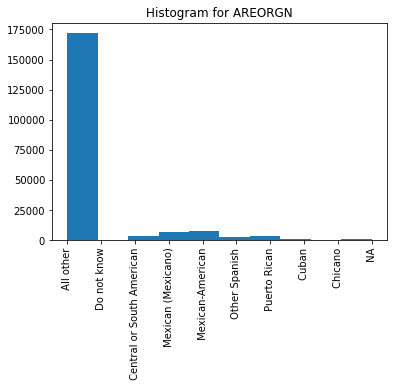

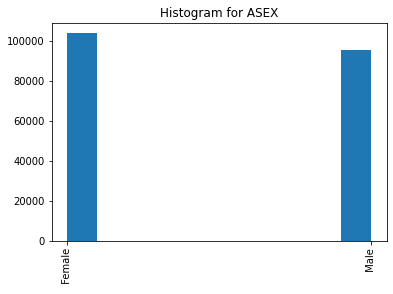

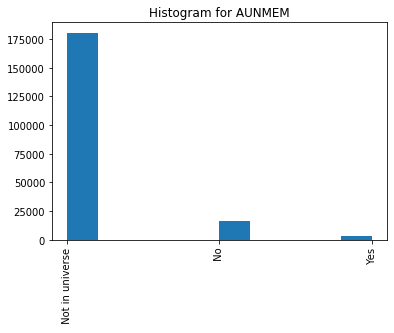

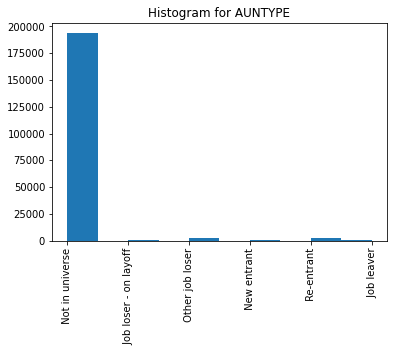

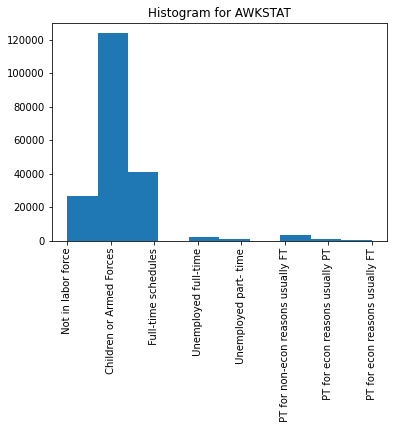

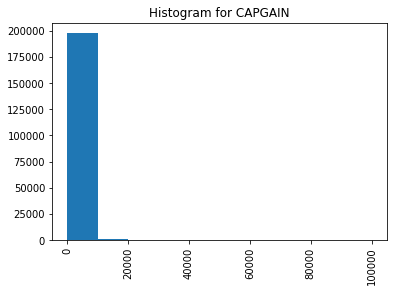

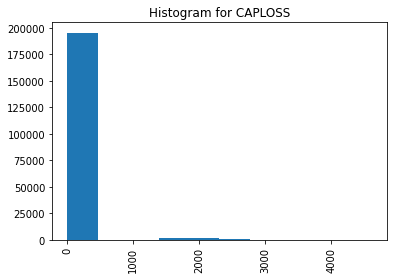

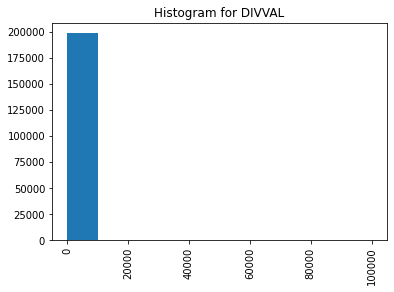

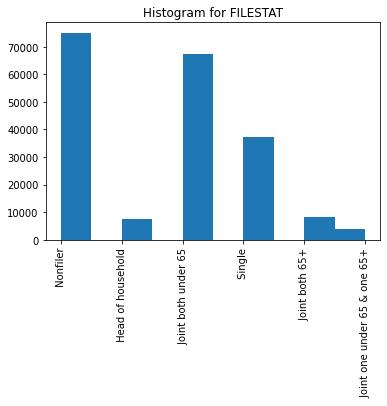

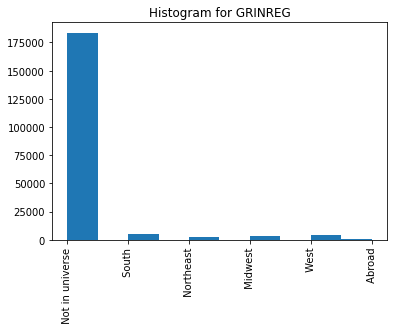

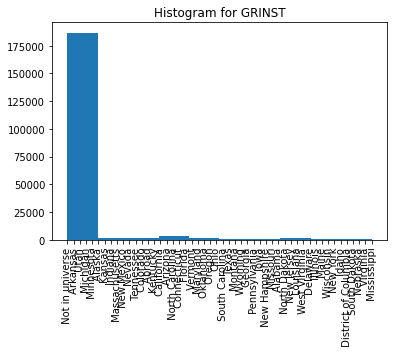

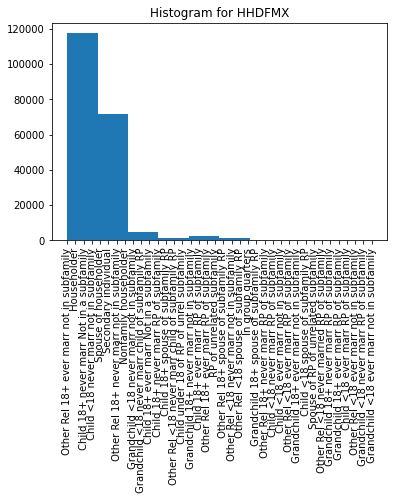

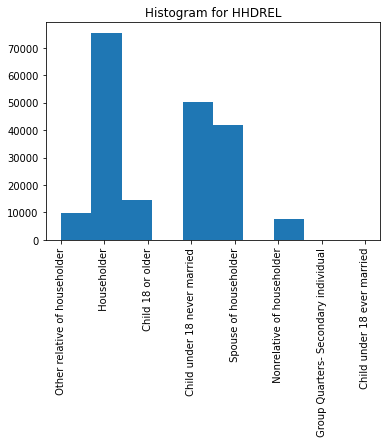

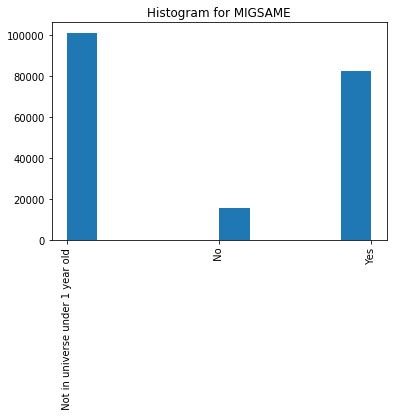

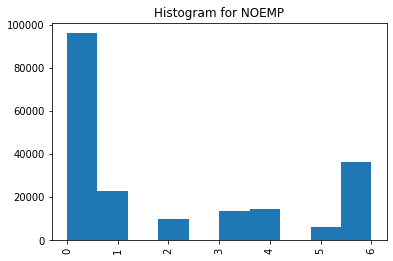

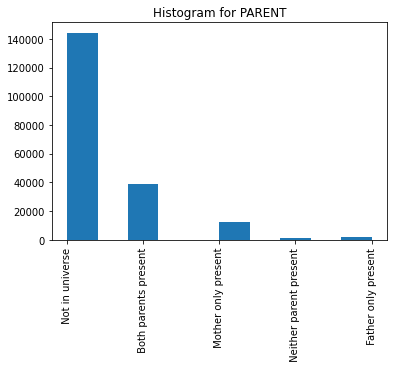

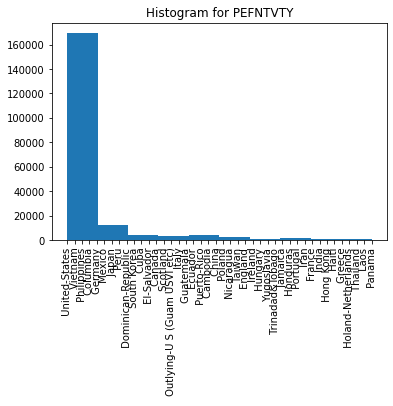

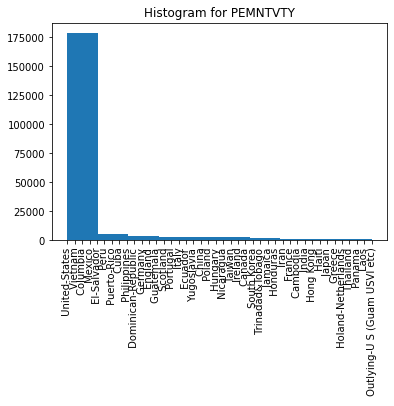

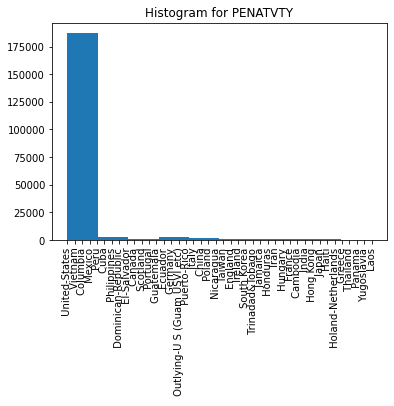

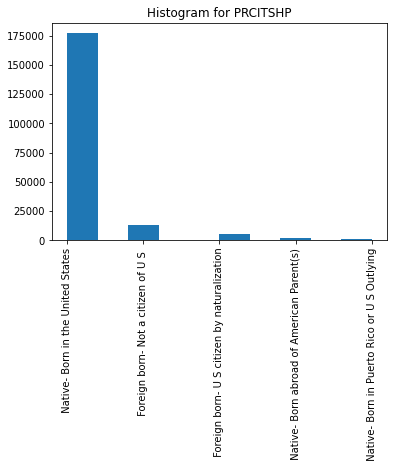

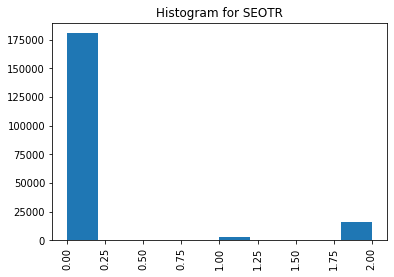

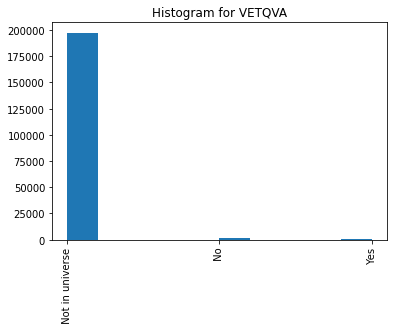

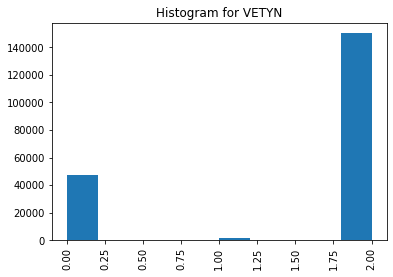

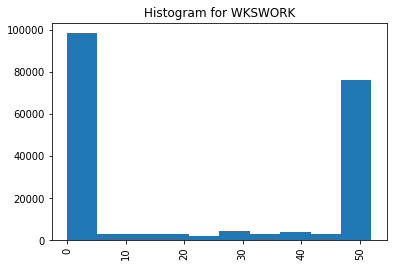

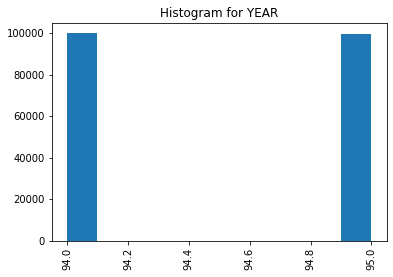

In [5]:
## Feature Analysis

## 2.1 plotting histograms
def plot_hist(col_name,col):
    
    title = "Histogram for " + col_name
    plt.title(title)
    plt.hist(col)
    plt.xticks(rotation="vertical")
    plt.show()
    
for col in population.columns:
    plot_hist(col,population[col])

In [6]:
## 2.2

## picking features with variation across categories
population_filtered = population[["AAGE","ACLSWKR","ADTIND","ADTOCC","AHGA","AMARITL","AMJIND","AMJOCC","ASEX","AWKSTAT","FILESTAT","HHDFMX","HHDREL","MIGSAME","NOEMP","PARENT","VETYN","WKSWORK","YEAR"]]

## picking columns with categorical data
categorical = list(set(population_filtered.columns) - set(["AAGE","ADTIND","ADTOCC","NOEMP","VETYN","WKSWORK","YEAR"]))

In [7]:
## 3

## 3.1 - already done

## 3.2
## numeric to cateogrical
pd.options.mode.chained_assignment = None 

population_filtered["AAGE_cut"] = pd.cut(population["AAGE"],bins=3)
population_filtered["ADTIND_cut"] = pd.cut(population["ADTIND"],bins=3)
population_filtered["ADTOCC_cut"] = pd.cut(population["ADTOCC"],bins=3)
population_filtered["WKSWORK_cut"] = pd.cut(population["WKSWORK"],bins=3)

population_filtered.drop(["AAGE","ADTIND","ADTOCC","WKSWORK"],axis=1,inplace=True)

## 3.3

one_hot = pd.get_dummies(population_filtered, columns = population_filtered.columns) ## 199523*166

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(one_hot)

variance = [0.90,0.80,0.70,0.60,0.50]
components = []

for v in variance:
    k=0
    total = sum(pca.explained_variance_)
    current_variance = 0

    while current_variance / total < v:

        current_variance += pca.explained_variance_[k]
        k+=1
        
    components.append(k)
    print(k)

37
20
11
6
4


In [45]:
## pca with 3 components
pca = PCA(n_components = 3, whiten=True)
transformed_data = pca.fit_transform(one_hot)
transformed_data.shape, pca.components_.shape

((199523, 3), (3, 166))

In [10]:
## get the top 3 features
n = pca.components_.shape[0]
top_features = [np.abs(pca.components_[i]).argmax() for i in range(n)]
feature_names = one_hot.columns
top_features = [feature_names[top_features[i]] for i in range(n)]

top_features

['AMJIND_ Not in universe or children', 'YEAR_94', 'AMARITL_ Never married']

In [11]:
## 4

class K_Median:
    def __init__(self, k = 2, max_iter = 15):
        self.k = k
        self.max_iter = max_iter
        
        
    def fit (self, data):
        self.medians = []
        ## medians init
        for i in range(self.k):
            self.medians.append(data[i])
            
        for i in range(self.max_iter):
            
            print("iteration:",i)
            
            ## assign the cluster to each point
            clusters = []
            for j in range(self.k):
                clusters.append([])
                
            for point in data:
                
                ## find N1 norm for all points
                distances = [(abs(point - m)).sum() for m in self.medians]
                ## pick min distance
                minDistance = min(distances)
                ## find index of minDistance to get cluster number
                l = distances.index(minDistance)
                # add this point to cluster l
                clusters[l].append(point)
    
            ## update median values
            change = False
            for j in range(self.k):
                new_median = np.median(clusters[j], axis=0)
                if not np.array_equal(self.medians[j], new_median):
                    change = True
                self.medians[j] = new_median
            if not change:
                break
    
    def predict(self, test_data):
        predictions = []
        for point in test_data:
            ## N1 norm 
            distances = [(abs(point - m)).sum() for m in self.medians]
            ## minDistance
            minDistance = min(distances)
            ## find corresponding index
            l = distances.index(minDistance)
            ## append the cluster index
            predictions.append(l)
        return predictions

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
10 th iteration done! Cost is: 0.002338089782599527
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
11 th iteration done! Cost is: 0.0022626164209812324
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
12 th iteration done! Cost is: 0.002185434839927475
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
13 th iteration done! Cost is: 0.0021697865

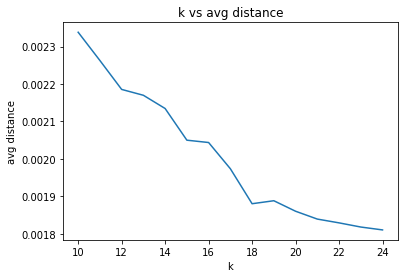

In [97]:
## 4.1 and 4.2

x = []
y = []

#one_hot = one_hot[:1000]
one_hot = transformed_data
for k in range(10,25):
    
    model = K_Median(k,15)
    model.fit(np.array(one_hot))
    
    one_hot_pred = model.predict(np.array(one_hot))
    centers = model.medians
    
    one_hot_centers = np.array([centers[i] for i in one_hot_pred])
    
    cost = np.sqrt((abs(one_hot_centers-one_hot)).sum().sum())
    
    x.append(k)
    y.append(cost/len(one_hot))
    print(k,"th iteration done! Cost is:",cost/len(one_hot))
    
plt.plot(x,y)
plt.xlabel("k")
plt.ylabel("avg distance")
plt.title("k vs avg distance")
plt.show()

In [46]:
## 4.3
one_hot = transformed_data
model = K_Median(15,50)
model.fit(np.array(one_hot))
    
one_hot_pred = model.predict(np.array(one_hot))
centers = model.medians

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30


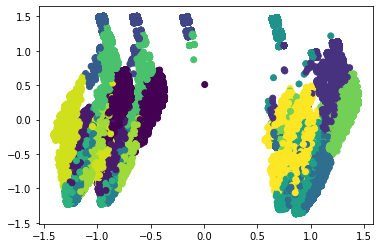

In [47]:
## plot for 2 dimensions for better visualization

x = one_hot[:,:2]
plt.scatter(x[:,1],x[:,0], c=one_hot_pred)
plt.show()

In [179]:
## 5

more_than_50k.replace(" ?",float("nan"),inplace=True)

remove_cols = []
total = len(more_than_50k)
for col in more_than_50k.columns:
    
    nan_num = more_than_50k[col].isna().sum()
    
    if nan_num != 0:
        print(col, "- NaN count:", nan_num,"| NaN ratio:",nan_num/total)
    
    if nan_num/total >= 0.40:
        remove_cols.append(col)
    
## remove cols
more_than_50k.drop(remove_cols,axis=1,inplace=True)

GRINST - NaN count: 14 | NaN ratio: 0.003910614525139665
MIGMTR1 - NaN count: 1906 | NaN ratio: 0.5324022346368715
MIGMTR3 - NaN count: 1906 | NaN ratio: 0.5324022346368715
MIGMTR4 - NaN count: 1906 | NaN ratio: 0.5324022346368715
MIGSUN - NaN count: 1906 | NaN ratio: 0.5324022346368715
PEFNTVTY - NaN count: 162 | NaN ratio: 0.045251396648044694
PEMNTVTY - NaN count: 134 | NaN ratio: 0.037430167597765365
PENATVTY - NaN count: 93 | NaN ratio: 0.025977653631284917


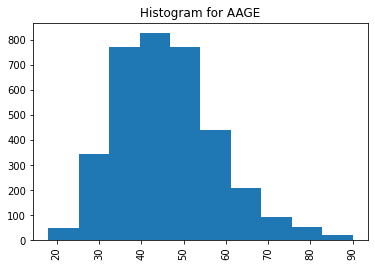

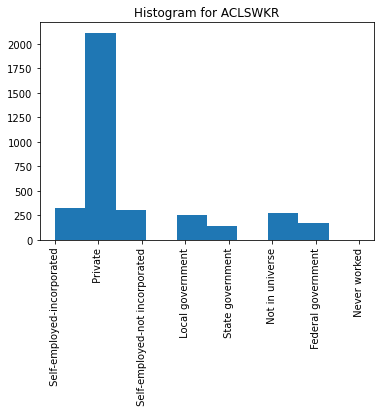

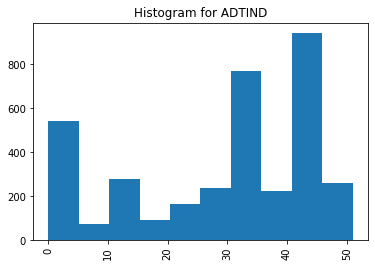

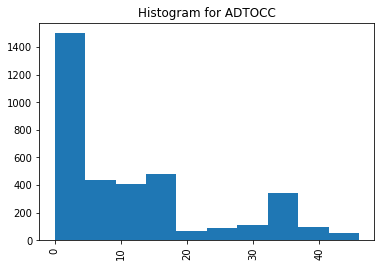

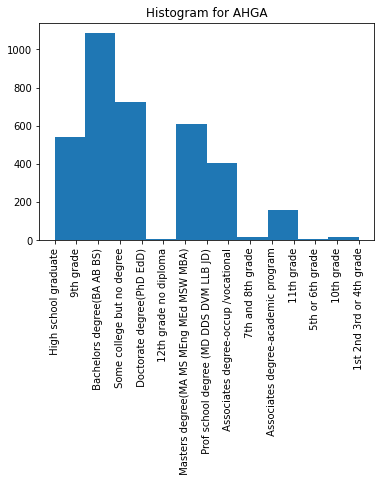

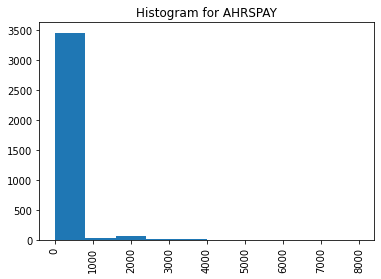

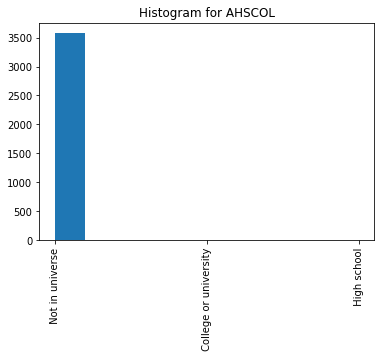

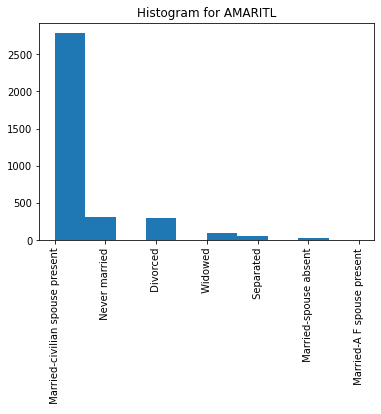

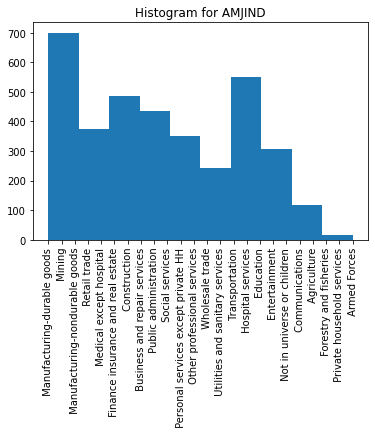

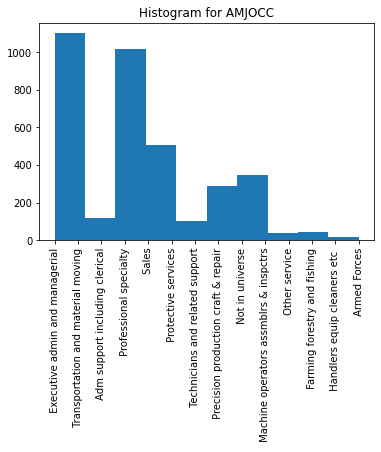

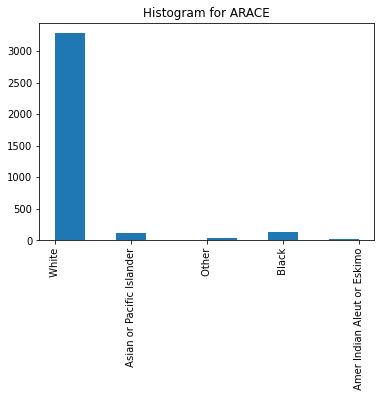

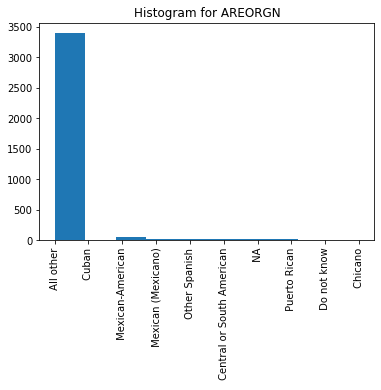

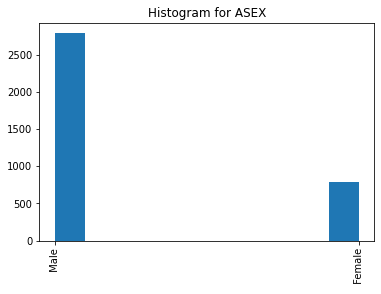

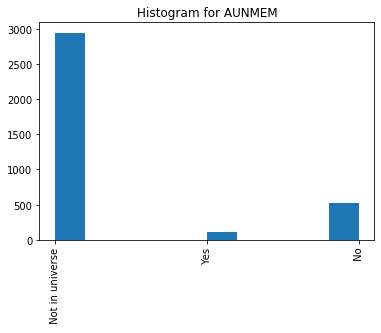

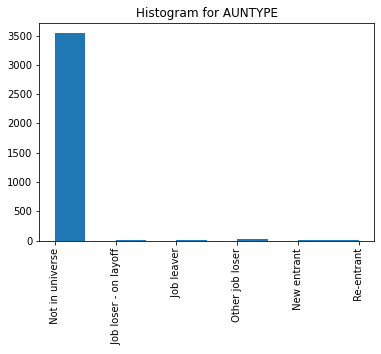

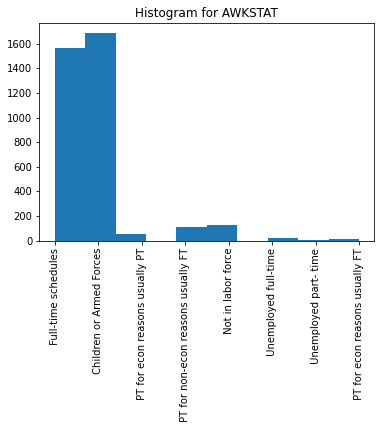

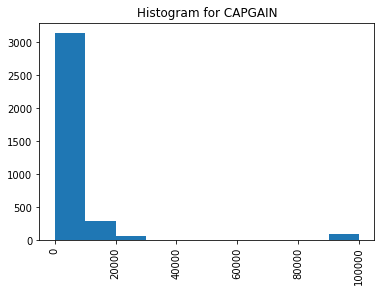

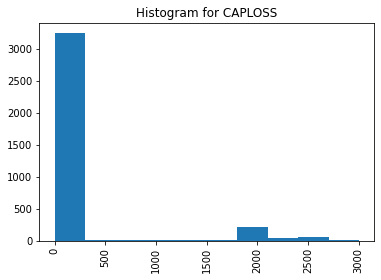

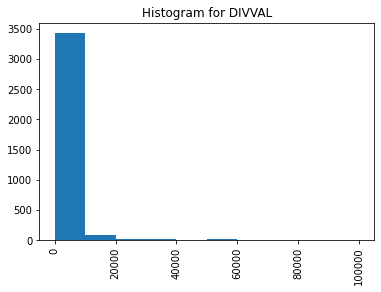

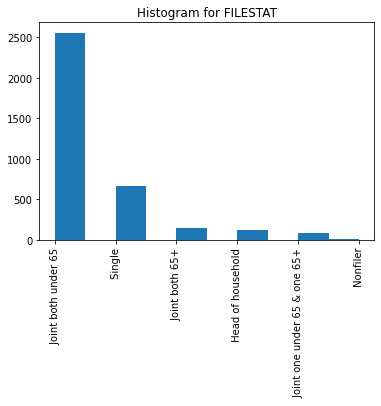

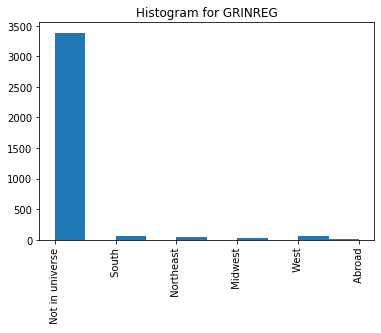

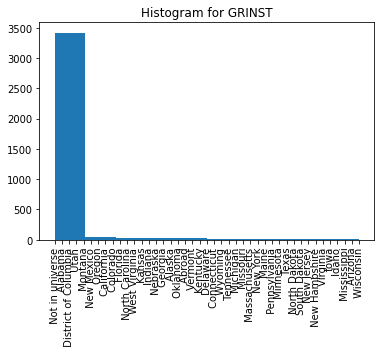

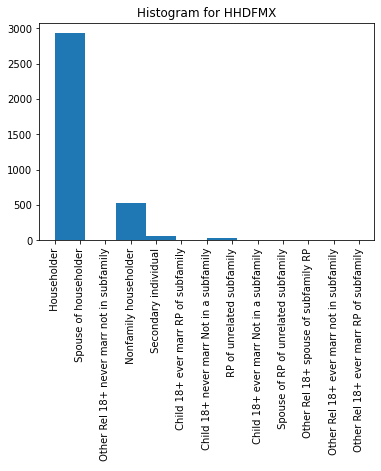

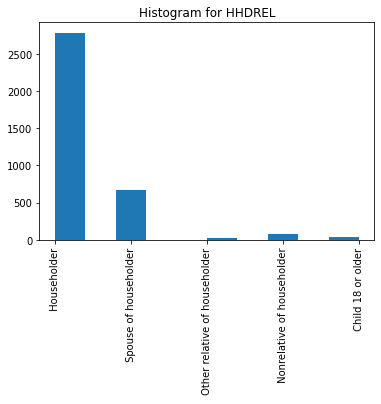

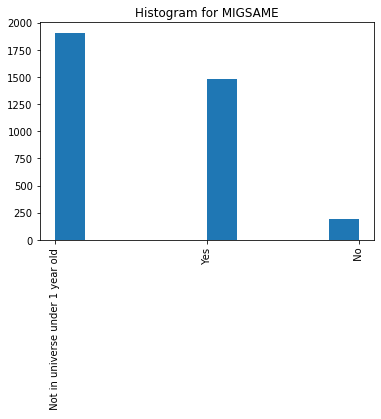

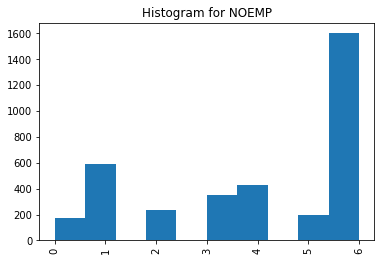

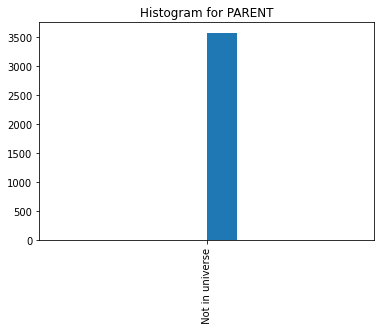

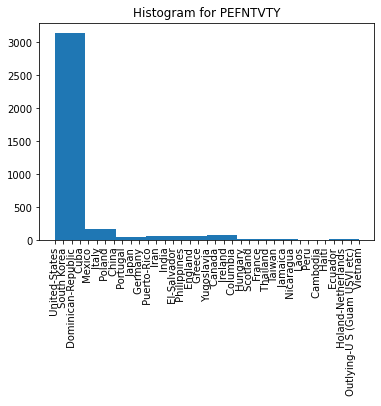

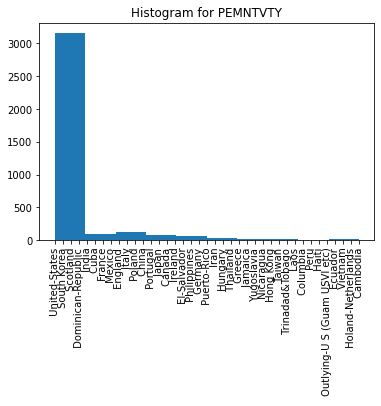

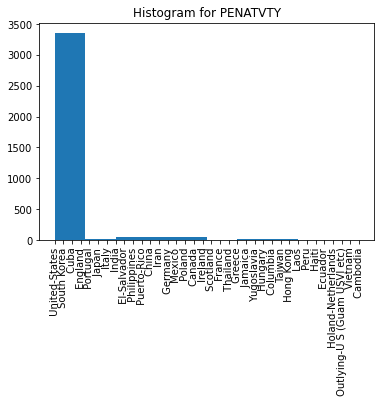

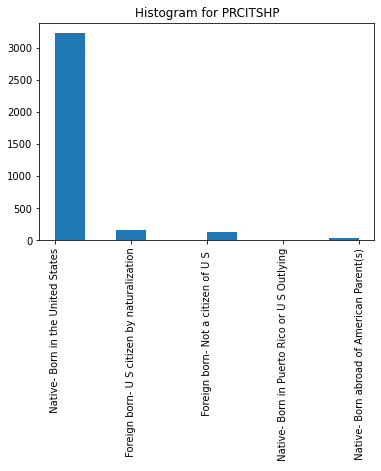

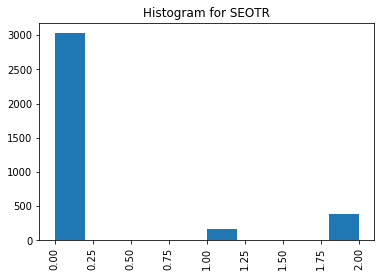

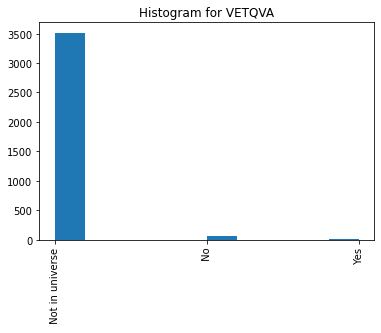

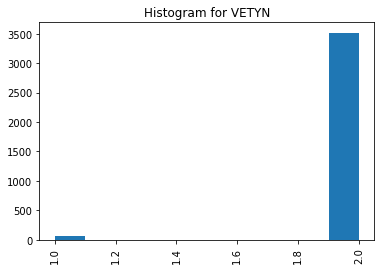

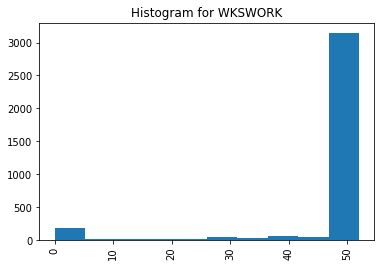

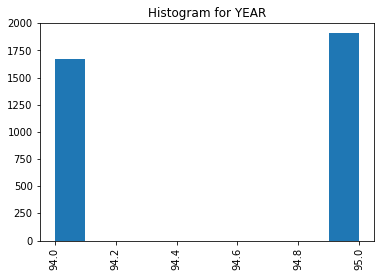

In [180]:
for i in range(len(more_than_50k.columns)):
    col = more_than_50k.columns[i]
    more_than_50k[col].fillna(modes[i],inplace=True)
    
for col in more_than_50k.columns:
    plot_hist(col,more_than_50k[col])

In [15]:
more_than_50k_filtered = more_than_50k[["AAGE","ACLSWKR","ADTIND","ADTOCC","AHGA","AMARITL","AMJIND","AMJOCC","ASEX","AWKSTAT","FILESTAT","HHDFMX","HHDREL","MIGSAME","NOEMP","PARENT","VETYN","WKSWORK","YEAR"]]

## picking columns with categorical data
categorical = list(set(more_than_50k_filtered.columns) - set(["AAGE","ADTIND","ADTOCC","NOEMP","VETYN","WKSWORK","YEAR"]))

more_than_50k_filtered["AAGE_cut"] = pd.cut(more_than_50k["AAGE"],bins=3)
more_than_50k_filtered["ADTIND_cut"] = pd.cut(more_than_50k["ADTIND"],bins=3)
more_than_50k_filtered["ADTOCC_cut"] = pd.cut(more_than_50k["ADTOCC"],bins=3)
more_than_50k_filtered["WKSWORK_cut"] = pd.cut(more_than_50k["WKSWORK"],bins=3)

more_than_50k_filtered.drop(["AAGE","ADTIND","ADTOCC","WKSWORK"],axis=1,inplace=True)


one_hot_50k = pd.get_dummies(more_than_50k_filtered, columns = more_than_50k_filtered.columns) ## 199523*166

In [16]:
transformed_data_50k = pca.fit_transform(one_hot_50k)
transformed_data_50k.shape, pca.components_.shape

((3580, 3), (3, 129))

In [17]:
one_hot_50k = transformed_data_50k

model_50k = K_Median(15,50)
model_50k.fit(np.array(one_hot_50k))
    
one_hot_50k_pred = model_50k.predict(np.array(one_hot_50k))
centers_50k = model_50k.medians

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30


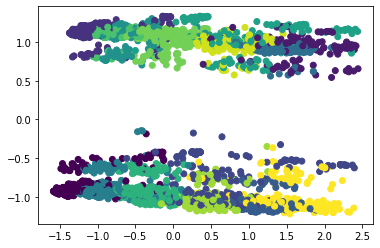

In [44]:
## plot for 2 dimensions for better visualization

x = np.array(one_hot_50k)[:,:2]
plt.scatter(x[:,1],x[:,0], c=one_hot_50k_pred)
plt.show()

In [50]:
np.savetxt("one_hot_pred.csv",np.array(one_hot_pred),delimiter=",")
np.savetxt("centers.csv",np.array(centers),delimiter=",")
np.savetxt("one_hot_50k_pred.csv",np.array(one_hot_50k_pred),delimiter=",")
np.savetxt("centers_50k.csv",np.array(centers_50k),delimiter=",")

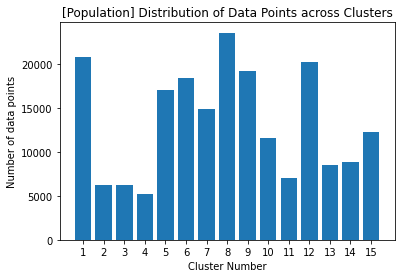

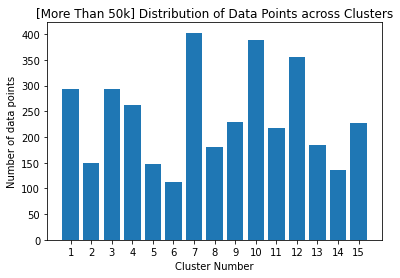

In [84]:
## 6 analysis

## 6.1
freq = pd.Series(one_hot_pred).value_counts()
x = [i for i in range(1,16)]
y = np.array([freq[i] for i in range(15)])

plt.title("[Population] Distribution of Data Points across Clusters")
plt.xlabel("Cluster Number")
plt.ylabel("Number of data points")
plt.xticks(np.arange(1, 16, step=1))
plt.bar(x,y)
plt.show()

freq_50k = pd.Series(one_hot_50k_pred).value_counts()
x = [i for i in range(1,16)]
y_50k = np.array([freq_50k[i] for i in range(15)])

plt.title("[More Than 50k] Distribution of Data Points across Clusters")
plt.xlabel("Cluster Number")
plt.xticks(np.arange(1, 16, step=1))
plt.ylabel("Number of data points")
plt.bar(x,y_50k)
plt.show()

## In general population, clusters 1,8,12 have the majority data 
## whereas clusters 2,3,4,11 have the minimum
## In more_than_50k population, clusters 7,10,12 have the majority data 
## whereas clusters 2,5,6,14 have the minimum

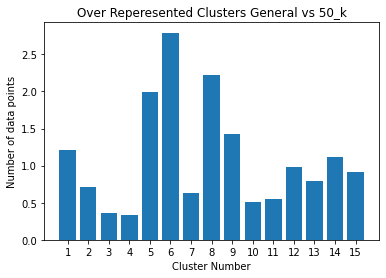

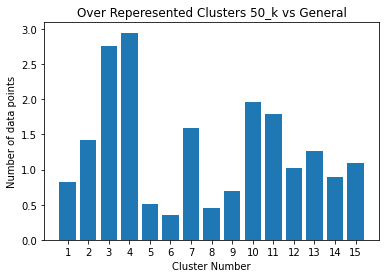

In [89]:
## 6.2

## scale frequency arrays
y = y*100.0/y.max()
y_50k = y_50k*100.0/y_50k.max()

## over represented in general vs 50_k
ratio_1 = y/y_50k

plt.title("Over Reperesented Clusters General vs 50_k")
plt.xlabel("Cluster Number")
plt.xticks(np.arange(1, 16, step=1))
plt.ylabel("Number of data points")
plt.bar(x,ratio_1)
plt.show()

## for general vs 50_k data
## clusters 5,6,8 are most over represented
## clusters 3,4,10,11 are most under represented

## over represented in 50_k vs general
ratio_2 = y_50k/y

plt.title("Over Reperesented Clusters 50_k vs General")
plt.xlabel("Cluster Number")
plt.xticks(np.arange(1, 16, step=1))
plt.ylabel("Number of data points")
plt.bar(x,ratio_2)
plt.show()

## for 50_k vs general data
## clusters 3,4 are most over represented
## clusters 5,6,8,9 are most under represented

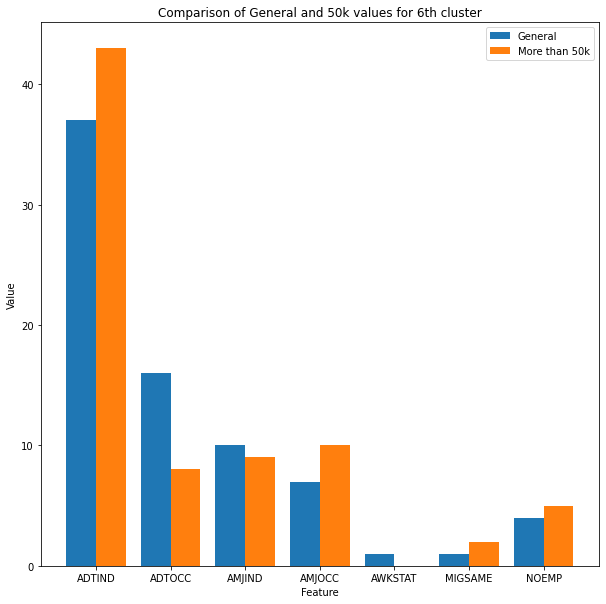

In [201]:
## 6.3

## NOTE: the 3 features considered for PCA are - 
## '(industry code) AMJIND_ Not in universe or children', 'YEAR_94', 'AMARITL_ Never married'

## Analysis of cluster-6 (most over represented in general vs 50_k)
center1_general = centers[5]
center1_50k = centers_50k[5]

center1_general_inv = pca.inverse_transform(center1_general)
center1_50k_inv = pca.inverse_transform(center1_50k)

### convert categorical to numeric

for col in population.columns:
    
    if population[col].dtype=="object":
        
        label_encoder = LabelEncoder()
        population[col] = label_encoder.fit_transform(population[col])
        more_than_50k[col] = label_encoder.transform(more_than_50k[col])
        
###

center1_general_pts = population.iloc[np.where(np.array(one_hot_pred)==5)]
center1_50k_pts = more_than_50k.iloc[np.where(np.array(one_hot_50k_pred)==5)]


## picking median value
central1_general = center1_general_pts.median(axis=0)
central1_50k = center1_50k_pts.median(axis=0)

rows = []
col1 = []
col2 = []

for i in range(len(central1_general.keys())):
    
    #check = central1_general[central1_general.keys()[i]]
    v1 = central1_general[central1_general.keys()[i]]
    v2 = central1_50k[central1_50k.keys()[i]]
    
    if(v1!=0 and abs(1-v2/v1) > 0.1) or (v2!=0 and abs(1-v1/v2) > 0.1):
        rows.append(central1_general.keys()[i])
        col1.append(v1)
        col2.append(v2)
        
from matplotlib.pyplot import figure
figure(figsize=(10,10))
plt.title("Comparison of General and 50k values for 6th cluster")
plt.xlabel("Feature")
plt.ylabel("Value")
x_axis = np.arange(len(rows))
plt.bar(x_axis-0.2,col1,0.4,label="General")
plt.bar(x_axis+0.2,col2,0.4,label="More than 50k")
plt.xticks(x_axis,rows)
plt.legend()
plt.show()

### Comparison 

From the above plot, we observe the difference in median values of general population and >50k population.

The industry codes, occupation codes, employment status, housing status and employer status are different

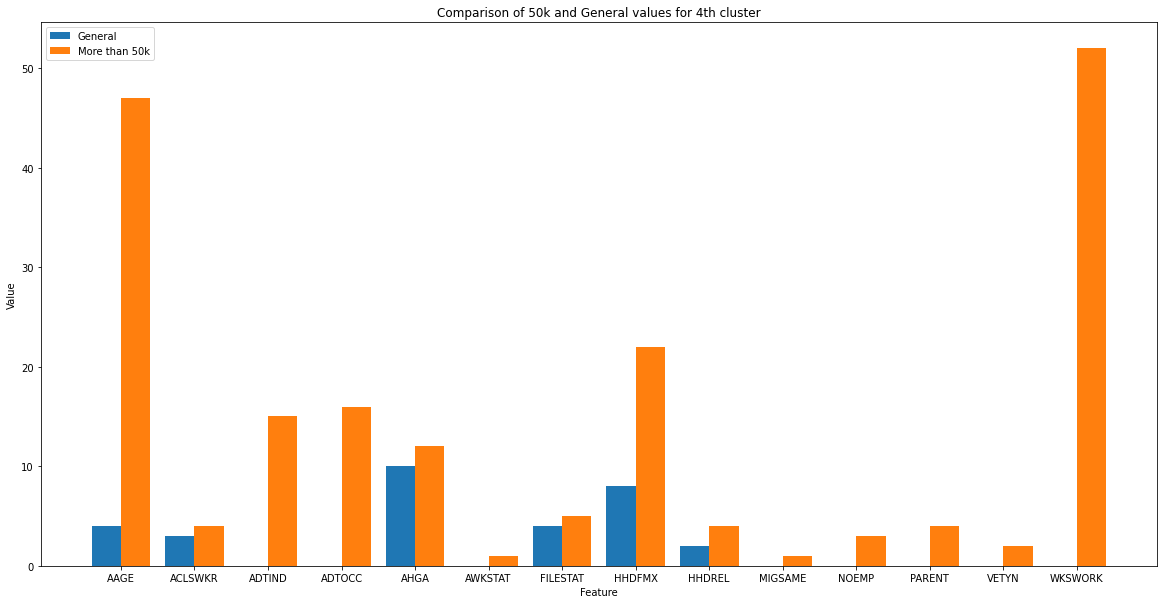

In [202]:
## 6.4

## analysis of cluster-4 (most over represented in 50k vs general)

## NOTE: the 3 features considered for PCA are - 
## '(industry code) AMJIND_ Not in universe or children', 'YEAR_94', 'AMARITL_ Never married'

center2_general = centers[3]
center2_50k = centers_50k[3]

center2_general_inv = pca.inverse_transform(center2_general)
center2_50k_inv = pca.inverse_transform(center2_50k)

center2_general_pts = population.iloc[np.where(np.array(one_hot_pred)==3)]
center2_50k_pts = more_than_50k.iloc[np.where(np.array(one_hot_50k_pred)==3)]

## picking median value
central2_general = center2_general_pts.median(axis=0)
central2_50k = center2_50k_pts.median(axis=0)

rows = []
col1 = []
col2 = []

for i in range(len(central2_general.keys())):
    
    v1 = central2_general[central2_general.keys()[i]]
    v2 = central2_50k[central2_50k.keys()[i]]
    
    ## pick if there's a > 10% difference
    if (v1.dtype=="object" and v1!=v2) or (v1!=0 and abs(1-v2/(v1)) > 0.1) or (v2!=0 and abs(1-v1/(v2)) > 0.1):
        rows.append(central2_general.keys()[i])
        col1.append(v1)
        col2.append(v2)
        
from matplotlib.pyplot import figure
figure(figsize=(20,10))
plt.title("Comparison of 50k and General values for 4th cluster")
plt.xlabel("Feature")
plt.ylabel("Value")
x_axis = np.arange(len(rows))
plt.bar(x_axis-0.2,col1,0.4,label="General")
plt.bar(x_axis+0.2,col2,0.4,label="More than 50k")
plt.xticks(x_axis,rows)
plt.legend()
plt.show()

## Comparison

Similar to previous part, for the cluster 4, following columns are different - Age, Worker class, industry code, occupation code, education level, employment status, tax status, family status, household summary, house consistency, employer status, number of members under 18, veteran benefits and weeks worked in a year.

Observe that for this cluster, > 50k group outperforms the general population in every single feature, especially age and weeks worked in a year.